# Opisna statistika

Ta dokument lahko poženete ali pregledate v brskalniku

[![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/mrcinv/ovs.py/master) 
<a href="https://nbviewer.jupyter.org/github/mrcinv/ovs.py/blob/master/opisna_statistika.ipynb">
    <img width="109" height="20" src="https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.png"/>
</a>

Ta dokument si lahko prenesete na svoj računalnik in poženete, tako da v terminalu napišete naslednje

    git clone https://github.com/mrcinv/ovs.py.git
    cd ovs.py
    jupyter-lab &

## Kazalo
- [frekvence in relativne frekvence](#Frekvence-in-relativne-frekvence)
- [razpon](#Razpon), [modus](#modus), [mediana, kvartili, percentili](#Mediana%2C-kvartili-in-percentili)
- povprečje, standardni odklon
- histogram
- grafični prikazi
  * [histogram](#Histogram)
  * [razsevni diagram](#Razsevni-diagram)

## Frekvence in relativne frekvence

Naj bo $X$ slučajna spremenljivka in $x_k$ ena izmed možnih vrednosti. 

 * **Frekvenca** vrednosti $x_k$ je število pojavitev vrednosti $x_k$ v celotni populaciji oziroma vzorcu.
 * **Relativna frekvenca** vrednosti $x_k$ je razmerje med frekvenco in velikostjo celotne populacije oziroma vzorca.
 
## Modus

Naj bo $X$ slučajna spremenljivka. **Modus** je vrednost $m\in Z_X$ z največjo verjetnostjo, z drugimi besedami **modus** $m$ je vrednost, za katero je $P(X=m)$ največja med vsemi možnimi vrednostmi. Modus določimo tako, da pogledamo, kateri podatek se pojavlja najpogosteje. Če vsak podatek nastopa le po enkrat, rečemo, da modusa ni. V primeru, da se več podatkov pojavlja enakomnogokrat najpogosteje, potem je modusov več.

### Naloga

Naloži [podatke](http://www.stat.si/dokument/5424/kohezijske_%20statisticne_obcine.xls) o statističnih pokrajinah in občinah v Sloveniji. Naj bo $P$ spremenljivka, ki za vsako občino pove ime regije. 

* Določi frekvence in relativne frekvence za posamezne vrednosti $P$. Za vsako pokrajino določi število občin in relativni delež vseh občin.
* Katera pokrajina je *modus*? Z drugimi besedami, katera pokrajina ima največ občin?

In [19]:
import pandas as pd
obcine = pd.read_excel("kohezijske_ statisticne_obcine.xls")

In [29]:
obcine.head()

,"Kohezijski regiji (2), statistične regije (12) in občine Republike Slovenije (212)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Šifra kohezijske regije, nacionalna","Šifra kohezijske regije, Eurostat",Ime kohezijske regije,"Šifra statistične regije, nacionalna","Šifra statistične regije, Eurostat",Ime statistične regije,Šifra občine,Ime občine
2,1,SI03,Vzhodna Slovenija,1,SI031,Pomurska,195,Apače
3,1,SI03,Vzhodna Slovenija,1,SI031,Pomurska,2,Beltinci
4,1,SI03,Vzhodna Slovenija,1,SI031,Pomurska,152,Cankova


In [41]:
obcine = obcine[2:]

In [57]:
regije = obcine['Unnamed: 5']
frekvence = {}
for regija in regije:
    frekvence[regija] = frekvence.get(regija, 0) + 1

In [58]:
frekvence

{'Pomurska': 27,
 'Podravska': 41,
 'Koroška': 12,
 'Savinjska': 31,
 'Zasavska': 4,
 'Posavska': 6,
 'Jugovzhodna Slovenija': 21,
 'Primorsko-notranjska': 6,
 'Osrednjeslovenska': 25,
 'Gorenjska': 18,
 'Goriška': 13,
 'Obalno-kraška': 8}

In [59]:
n = len(obcine)
relativne_frekvence = {regija: frekvence[regija]/n for regija in frekvence}
relativne_frekvence

{'Pomurska': 0.12735849056603774,
 'Podravska': 0.19339622641509435,
 'Koroška': 0.05660377358490566,
 'Savinjska': 0.14622641509433962,
 'Zasavska': 0.018867924528301886,
 'Posavska': 0.02830188679245283,
 'Jugovzhodna Slovenija': 0.09905660377358491,
 'Primorsko-notranjska': 0.02830188679245283,
 'Osrednjeslovenska': 0.1179245283018868,
 'Gorenjska': 0.08490566037735849,
 'Goriška': 0.06132075471698113,
 'Obalno-kraška': 0.03773584905660377}

In [63]:
for regija in frekvence:
    print("{}:\t {}".format(regija, frekvence[regija]*"#"))

Pomurska:	 ###########################
Podravska:	 #########################################
Koroška:	 ############
Savinjska:	 ###############################
Zasavska:	 ####
Posavska:	 ######
Jugovzhodna Slovenija:	 #####################
Primorsko-notranjska:	 ######
Osrednjeslovenska:	 #########################
Gorenjska:	 ##################
Goriška:	 #############
Obalno-kraška:	 ########


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

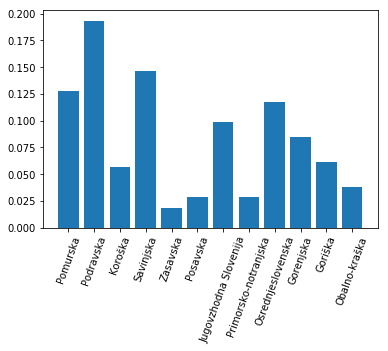

In [73]:
plt.bar(range(len(relativne_frekvence)), relativne_frekvence.values(), 
        tick_label=list(relativne_frekvence.keys()))
plt.xticks(rotation=70)

## Razpon

Naj bo $X$ številska slučajna spremenljivka. **Razpon** je najmanjši interval, na katerem ležijo vse možne vrednosti, ki jih lahko spremenljivka zavzame. Če obstajata minimalna $x_m$ in maksimalna vrednost $x_M$ slučajne spremenljivke $X$ je **razpon** interval $[x_m, x_M]$.

## Mediana, kvartili in percentili

* 100$p$-ti (per)centil za $p\in [0, 1]$, je najmanjša vrednost $q_p$, za katero je $P(X\le q_p)\ge p$. 
* 50. percentil se imenuje **mediana**.
* Centile za $p=\frac{k}{4}$ imenujemo kvartili. **Prvi kvartil** je enak 25. percentilu, **drugi kvartil** je enak mediani,  **tretji kvartil** pa je enak 75. percentilu.

## Naloga

Predpostavimo, da je telesna višina odraslih moških porazdeljena normalno $N(180cm, 7cm)$ in telesna višina odraslih žensk $N(168cm, 5cm)$. Kateri percentil in kateri kvartil je najbližji tvoji telesni višini?

In [74]:
from scipy.stats import norm
?norm

Signature:       norm(*args, **kwds)
Type:            norm_gen
String form:     <scipy.stats._continuous_distns.norm_gen object at 0x7f99591e8438>
File:            /usr/lib/python3/dist-packages/scipy/stats/_continuous_distns.py
Docstring:      
A normal continuous random variable.

The location (loc) keyword specifies the mean.
The scale (scale) keyword specifies the standard deviation.

As an instance of the `rv_continuous` class, `norm` object inherits from it
a collection of generic methods (see below for the full list),
and completes them with details specific for this particular distribution.

Methods
-------
rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  

In [77]:
norm.cdf(188, 180, 7)*100

87.34510455264423

In [82]:
# kvartili
[norm.ppf(p, 180, 7) for p in [0.25, 0.5, 0.75]]

[175.27857174862743, 180.0, 184.72142825137257]

## Povprečje, standardni odklon

## Grafične predstavitve

* Knjižnica [matplotlib](https://matplotlib.org/gallery/index.html) za risanje grafov v Pythonu

## Histogram

* [O histogramih v Pythonu](https://realpython.com/python-histograms/)

### Naloga
Na spletni strani statističnega urada pridobi podatke o številu prebivalcev po občinah. 
* Poišči razpon
* Razpon razdeli na 10 enakih intervalov/razredov in določi frekvence in relativne frekvence za posamezni razred
* Nariši histogram
* Katera velikost občine je najbolj pogosta (modus)?
* Izberi določeno občino in določi h katerem percentilu in katerem kvartilu spada po številu prebivalcev


In [89]:
obcine = pd.read_csv("podatki/obcine.csv", encoding="latin2")
obcine.head()

,Občina,prebivalci
0,Ajdovčina,19154
1,Ankaran/Ancarano,3216
2,Apače,3510
3,Beltinci,8159
4,Benedikt,2559


In [91]:
prebivalci = obcine.prebivalci
m, M = min(prebivalci), max(prebivalci)
m, M

(359, 289832)

(array([202.,   8.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([   359. ,  29306.3,  58253.6,  87200.9, 116148.2, 145095.5,
        174042.8, 202990.1, 231937.4, 260884.7, 289832. ]),
 <a list of 10 Patch objects>)

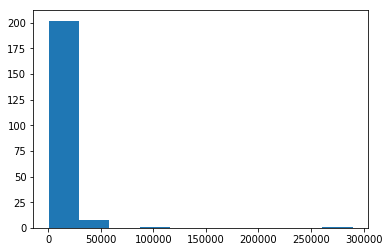

In [123]:
plt.hist(prebivalci, bins=10)

### Naloga
Na spletni strani [Gapminder](https://www.gapminder.org/tools) prikaži porazdelitev dohodkov po posameznih državah.
* Poišči državo, ki ima največji delež ljudi pod mejo ekstremne revščine.
* Primerjaj število ljudi z različnimi nivoji dohodka(income level 1, 2, 3 in 4) glede na celine.
* Približno določi mediano dohodka za nekaj največjih držav na različnih celinah

## Razsevni diagram

## Naloga
Na spletni strani Eurostat poišči podatke o vrsti energije po različnih virih. Nariši razsevni diagram med obnovljivimi viri in fosilnimi gorivi. Razvrsti države v različne razrede, glede na strukturo energije.

## Naloga

Na spletni strani [Gapminder](https://www.gapminder.org/tools) prikaži razsevni diagram med **prihodki** in **deležem kmetijskih površin**. 
* Razvrsti države na različne skupine. Opiši lastnosti posameznih skupin.
* Poišči Slovenijo in druge države, ki jih poznaš.

Nariši še razsevni diagram med **deležem zaposlenih v kmetijstvu** in **deležem kmetijskih površin**
* Poišči državo, ki ima največji delež kmetijskih površin na svetu in v Evropi. Prav tako poišči državo, ki ima največji delež zaposlenih v kmetijstvu.
* Poišči države, ki imajo velik delež kmetijskih površin. Katere države imajo kljub temu majhen delež delavcev v kmetijstvu. Razloži, kako je to mogoče.
* Poišči Slovenijo. V katero skupino držav spada. Primerjaj jo z Dansko. Poskusi razložiti zakaj takšna razlika!


## Povezave
Nekatere predtstavitve statističnih podatkov
* [statistični atlas evrope](http://ec.europa.eu/eurostat/statistical-atlas/gis/viewer)
* [gapminder](https://www.gapminder.org/tools/)

Viri podatkov za Python
* [Seaborn](http://deparkes.co.uk/2015/05/05/seaborn-python-plotting-library/)
* [Scikit-learn](http://scikit-learn.org/stable/datasets/)
* različni paketi za R-project vsebujejo kar nekaj [podatkovnih nizov](https://vincentarelbundock.github.io/Rdatasets/datasets.html)
* https://www.kaggle.com/datasets
* https://www.statsmodels.org/dev/datasets/index.html